 #  <span style="color:#D47FAC;"> <center>LIST 6 </center> </span>

Authors: _Jakubik Małgorzata, Szymkowiak Magdalena_

In [28]:
import time, random
import numpy as np
import matplotlib.pyplot as plt
#from scipy import linalg
from scipy.optimize import curve_fit

## <span style="color:#D47FAC;">TASK 2</span> 

Naszym zadaniem jest zaimplementowanie funkcji sortującej przy użyciu kopca binarnego. Posłużymy się klasą `BinHeap` zaprezentowaną na wykładzie. Przeprowadzimy również analizę eksperymentalną złożoności obliczeniowej naszej funkcji sortującej poprzez zmierzenie czasu wykonania funkcji dla poszczególnych wielkości listy.

In [29]:
class BinHeap: 
    def __init__(self):
        self.heapList=[0]
        self.currentSize=0
    
    def percUp(self,i):
        while i//2 > 0: 
            if self.heapList[i]<self.heapList[i//2]:
                tmp=self.heapList[i//2]
                self.heapList[i//2]=self.heapList[i]
                self.heapList[i]=tmp
        i=i//2
                
    def insert(self,k):
        self.heapList.append(k)
        self.currentSize=self.currentSize+1
        self.percUp(self.currentSize)

    def findMin(self):
        return self.heapList[1]

    def percDown(self,i):  #complexity O(logn)  (?)
        while(i*2)<=self.currentSize:
            mc=self.minChild(i)
            if self.heapList[i]>self.heapList[mc]:
                tmp=self.heapList[i]
                self.heapList[i]=self.heapList[mc]
                self.heapList[mc]=tmp
            i=mc
            
    def minChild(self,i):
        if i*2+1>self.currentSize:
            return i*2 
        else:
            if self.heapList[i*2]<self.heapList[i*2+1]:
                return i*2 
            else: 
                return i*2+1 
                 
    def delMin(self):  #complexity przejmuje od percDown
        retval=self.heapList[1]
        self.heapList[1]=self.heapList[self.currentSize]
        self.currentSize=self.currentSize-1 
        self.heapList.pop()
        self.percDown(1)
        return retval

    def buildHeap(self,alist):  #complexity O(n) (?)
        i=len(alist)//2
        self.currentSize=len(alist)
        self.heapList=[0]+alist[:]
        while(i>0):
            self.percDown(i)
            i=i-1
            
    def size(self):
        return self.currentSize
        
    def isEmpty(self):
        return self.currentSize==0
        
    def __str__(self):
        txt="{}".format(self.heapList[1:])
        return txt

In [40]:
def sorting_binheap(elem:list):
    """
    Sortuje kopiec binarny w rosnącej kolejności
    :param elem: lista elementów do posortowania
    return: posortowaną listę
    """
    
    if not isinstance(elem,list):
        return ValueError ('Given argument need to be a list')
    
    bn=BinHeap()
    bn.buildHeap(elem)
    result=[bn.delMin() for i in range(bn.size())]
    return result

In [39]:
elem = [3,6,8,1,30,395,318,203,67,80,21,5]
sorting_binheap(elem)

[1, 3, 5, 6, 8, 21, 30, 67, 80, 203, 318, 395]

In [32]:
def sorting_binheap_time(n:int):
    """
    Mierzy czas trwania funkcji 'sorting_binheap'
    :param n: liczba okresślająca wielkość listy 
    retrun: zmierzony czas
    """
    arr=list(np.random.random(n))
    
    start=time.time()
    result = sorting_binheap(arr)
    end=time.time()
    
    return  end-start

Czas na przeprowadzenie analizy eksperymentalnej czasu trawania funkcji sortującej `sorting_binheap`.
Spawdzimy czy ma ona złożoność $O(nlog(n))$.

In [41]:
def func(x,a,b):
    return a*x*np.log2(x) + b

In [56]:
def ploting_with_curve(n,step):
    """
    Rysuje wykres zależności czasu od wielkości posortowanej listy.
    :param n: ilość elementów w liście
    :param step: krok z jaką częstością mają pojawiać się argumenty
    """
    
    x_rng = range(1, n + 1, step)
    times = [sorting_binheap_time(i) for i in x_rng]
    x=np.array(x_rng)
    popt, pcov = curve_fit(func, x, times)
    
    plt.plot(x, times,'c.', label='dane')
    plt.plot(x, func(x, *popt), 'r-', label='dopasowana krzywa')
    
    print("Współczynniki dopasowanej funkcji : %f, %f"%(popt[0],popt[1]))
    
    plt.xlabel('liczba elementów do posortowania')
    plt.ylabel("czas")
    plt.title("Czas trwania funkcji 'sorting_binheap'")
    plt.legend()
    plt.grid()
    plt.show()


Współczynniki dopasowanej funkcji : 0.000002, -0.002487


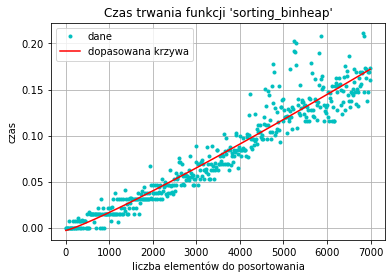

In [59]:
ploting_with_curve(7000,15)

Współczynniki dopasowanej funkcji : 0.000002, -0.000812


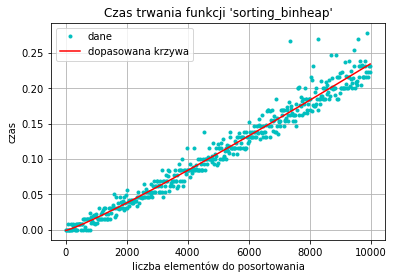

In [58]:
ploting_with_curve(10000,20)

Jak jesteśmy w stanie zauważyć dopasowanie funkcji $ Axlog(x) + b $ jest prawidłowe. Zatem funkcja `sorting_binheap` ma złożoność obliczeniową $O(nlog(n))$.